In [1]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge

In [2]:
TRAIN_TEST_SPLIT = 0.8

In [3]:
data = pd.read_csv('../model_data.csv')
data = data.loc[:, ~data.columns.str.contains('^Unnamed')]

In [4]:
data.dropna(inplace=True)
data.reset_index(drop=True, inplace=True)
data = data.iloc[:138,:]

In [5]:
data

,temp_pi_t0,hum_pi_t0,PM1_pi_t0,PM2.5_pi_t0,PM10_pi_t0,wind_speed_t0,temp_pi_t1,hum_pi_t1,PM1_pi_t1,PM2.5_pi_t1,...,PM10_pi_t4,wind_speed_t4,temp_pi_t5,hum_pi_t5,PM1_pi_t5,PM2.5_pi_t5,PM10_pi_t5,wind_speed_t5,PM2.5,PM10
0,17.625000,30.933333,4.365000,9.652500,15.223333,9.826088,19.983333,28.125000,4.610000,10.042500,...,15.388333,6.924738,8.316667,53.283333,6.042500,11.798333,17.710000,5.116561,6.641000,9.477000
1,11.616667,40.350000,2.710000,6.040000,9.553333,7.754637,12.683333,37.733333,4.529167,10.465000,...,15.750000,11.269782,18.650000,30.083333,3.752500,6.064167,8.284167,6.952755,7.147500,10.535000
2,8.466667,49.616667,4.839167,8.685833,12.543333,7.895416,9.416667,45.208333,3.826667,7.878333,...,16.762500,8.496304,13.990000,35.770000,3.787000,6.641000,9.477000,8.209263,8.777500,13.442500
3,6.516667,61.908333,5.355000,9.979167,14.669167,5.692100,6.850000,57.158333,5.519167,9.145833,...,12.093333,4.104631,10.425000,42.900000,3.815000,7.147500,10.535000,6.162207,7.956667,10.690833
4,4.981818,66.109091,6.809091,12.583636,18.430000,4.510787,5.358333,64.891667,6.549167,12.697500,...,12.672500,6.151683,7.566667,53.983333,4.285000,8.777500,13.442500,6.849467,13.833333,20.941667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,11.100000,75.850000,1.988333,3.983333,6.041667,16.203999,12.020000,73.920000,1.500000,4.924000,...,7.133333,15.111424,15.690000,59.910000,2.530000,5.369000,8.341000,19.137648,4.190909,6.679091
134,8.933333,71.766667,1.476667,4.356667,7.493333,21.434364,10.100000,72.400000,0.956000,2.718000,...,8.684000,14.345898,12.762500,76.437500,1.502500,3.553750,5.736250,13.905509,5.385000,9.160000
135,4.933333,76.922222,1.782222,4.942222,8.367778,15.137133,5.633333,77.383333,1.753333,5.618333,...,4.628000,12.074766,10.709091,77.600000,1.838182,4.190909,6.679091,16.935310,3.560000,4.923000
136,4.816667,78.983333,2.143333,4.403333,6.750833,14.618837,4.827273,78.490909,1.823636,4.080909,...,9.856667,18.171976,7.437500,73.687500,1.908750,5.385000,9.160000,21.995380,6.740000,10.450833


In [6]:
labels = ['PM2.5', 'PM10']

In [7]:
X = data.drop(labels, axis=1)
y1 = data[labels[0]]
y2 = data[labels[1]]

In [8]:
parameters = {'learning_rate':[0.01, 0.1, 1], 
              'n_estimators':[100, 500, 1000], 
              'max_depth':[2, 3, 4], 
              'colsample_bytree':[0.1, 0.5, 1]}

In [9]:
xgb = XGBRegressor()

In [10]:
search1 = GridSearchCV(xgb, parameters)
search2 = GridSearchCV(xgb, parameters)

In [11]:
search1.fit(X, y1)

GridSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None, random_state=None,
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, subsample=None,
                                    tree_method=None, validate_parameters=None,
      

In [12]:
search2.fit(X, y2)

GridSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None, random_state=None,
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, subsample=None,
                                    tree_method=None, validate_parameters=None,
      

In [13]:
params1 = search1.best_params_
params2 = search2.best_params_

In [14]:
print("Params 1: ", params1)
print("Params 2: ", params2)

Params 1:  {'colsample_bytree': 0.1, 'learning_rate': 0.01, 'max_depth': 2, 'n_estimators': 500}
Params 2:  {'colsample_bytree': 0.1, 'learning_rate': 0.01, 'max_depth': 2, 'n_estimators': 500}


In [15]:
n = int(TRAIN_TEST_SPLIT*data.shape[0])

X_train = data.iloc[:n,:]
X_test = data.iloc[n:,:]

y_train1 = X_train[labels[0]]
y_train2 = X_train[labels[1]]

y_true1 = X_test[labels[0]]
y_true2 = X_test[labels[1]]

X_train = X_train.drop(labels, axis=1)
X_test = X_test.drop(labels, axis=1)

In [16]:
model1 = XGBRegressor(**params1)
model1.fit(X_train.values, y_train1.values)
y_pred1 = model1.predict(X_test.values)
mse1 = mean_squared_error(y_true1, y_pred1)
mae1 = mean_absolute_error(y_true1, y_pred1)
print("MSE: {}".format(mse1))
print("MAE: {}".format(mae1))

MSE: 2.4430216112539647
MAE: 1.3485792210098642


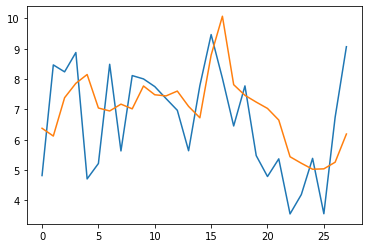

In [17]:
plt.plot(np.arange(len(y_true1)), y_true1)
plt.plot(np.arange(len(y_pred1)), y_pred1)
plt.show()

In [18]:
model2 = XGBRegressor(**params2)
model2.fit(X_train.values, y_train2.values)
y_pred2 = model2.predict(X_test.values)
mse2 = mean_squared_error(y_true2, y_pred2)
mae2 = mean_absolute_error(y_true2, y_pred2)
print("MSE: {}".format(mse2))
print("MAE: {}".format(mae2))

MSE: 6.035089143424495
MAE: 2.1763629561131137


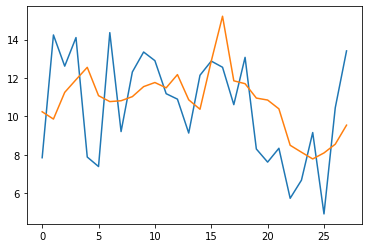

In [19]:
plt.plot(np.arange(len(y_true2)), y_true2)
plt.plot(np.arange(len(y_pred2)), y_pred2)
plt.show()

In [20]:
#Comparison with simple Ridge model
ridge = Ridge(alpha=2e-05)
ridge.fit(X_train.values, y_train1.values)
preds = ridge.predict(X_test.values)
mse = mean_squared_error(y_true1, preds)
mae = mean_absolute_error(y_true1, preds)
print("MSE: {}".format(mse))
print("MAE: {}".format(mae))

MSE: 2.959410316277263
MAE: 1.3285576663136074


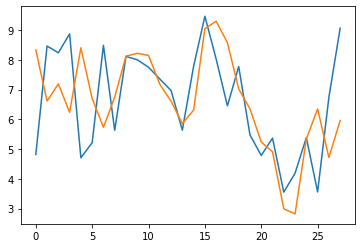

In [21]:
plt.plot(np.arange(len(y_true1)), y_true1)
plt.plot(np.arange(len(preds)), preds)
plt.show()

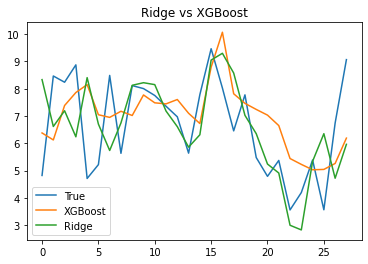

In [22]:
plt.plot(np.arange(len(y_true1)), y_true1)
plt.plot(np.arange(len(y_pred1)), y_pred1)
plt.plot(np.arange(len(preds)), preds)
plt.title("Ridge vs XGBoost")
plt.legend(['True', 'XGBoost', 'Ridge'])
plt.show()

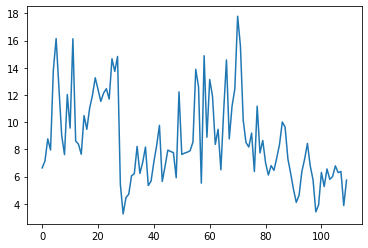

In [29]:
plt.plot(np.arange(len(y_train1)), y_train1)
plt.show()

In [27]:
X_train

,temp_pi_t0,hum_pi_t0,PM1_pi_t0,PM2.5_pi_t0,PM10_pi_t0,wind_speed_t0,temp_pi_t1,hum_pi_t1,PM1_pi_t1,PM2.5_pi_t1,...,PM1_pi_t4,PM2.5_pi_t4,PM10_pi_t4,wind_speed_t4,temp_pi_t5,hum_pi_t5,PM1_pi_t5,PM2.5_pi_t5,PM10_pi_t5,wind_speed_t5
0,17.625000,30.933333,4.365000,9.652500,15.223333,9.826088,19.983333,28.125000,4.610000,10.042500,...,4.840833,10.010000,15.388333,6.924738,8.316667,53.283333,6.042500,11.798333,17.710000,5.116561
1,11.616667,40.350000,2.710000,6.040000,9.553333,7.754637,12.683333,37.733333,4.529167,10.465000,...,4.610000,10.042500,15.750000,11.269782,18.650000,30.083333,3.752500,6.064167,8.284167,6.952755
2,8.466667,49.616667,4.839167,8.685833,12.543333,7.895416,9.416667,45.208333,3.826667,7.878333,...,4.529167,10.465000,16.762500,8.496304,13.990000,35.770000,3.787000,6.641000,9.477000,8.209263
3,6.516667,61.908333,5.355000,9.979167,14.669167,5.692100,6.850000,57.158333,5.519167,9.145833,...,3.826667,7.878333,12.093333,4.104631,10.425000,42.900000,3.815000,7.147500,10.535000,6.162207
4,4.981818,66.109091,6.809091,12.583636,18.430000,4.510787,5.358333,64.891667,6.549167,12.697500,...,5.519167,9.145833,12.672500,6.151683,7.566667,53.983333,4.285000,8.777500,13.442500,6.849467
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,6.250000,39.633333,1.966667,4.817500,7.861667,26.009842,7.455556,38.100000,2.594444,6.646667,...,2.857500,5.095000,7.332500,21.734581,1.681818,67.300000,3.049091,5.803636,8.612727,21.566973
106,5.420000,41.410000,2.431000,6.259000,10.376000,29.091030,5.616667,43.233333,1.573333,3.716667,...,2.594444,6.646667,11.003333,33.120000,6.940000,44.290000,2.734000,6.005000,9.448000,31.170673
107,4.445455,45.690909,2.440909,5.866364,9.520000,17.418196,4.300000,46.260000,2.158000,3.974000,...,1.573333,3.716667,5.995833,30.633865,5.309091,41.445455,2.524545,6.790909,11.402727,29.723444
108,4.360000,46.810000,1.817000,5.143000,8.756000,19.513195,4.420000,45.480000,2.235000,4.906000,...,2.158000,3.974000,5.808000,20.532627,4.454545,44.472727,2.246364,6.294545,10.689091,26.525429
